# multi_py example notebook

Make sure to move this Demo.ipynb Notebook out of the mulit_py folder before executing the cells below!

In [3]:
import matplotlib.pyplot as plt
from multi_py.multi import *
import numpy as np

%config InlineBackend.figure_format='svg'
plt.style.use('default')
plt.style.use('multi_py/Bergemann2020.mplstyle')

Read in all lines for one of the runs

In [4]:
runLTEfalc = m3d('runs/Si_falc_LTE_run/output/',  conts=[])
# runNLTEfalc = m3d('runs/Si_falc_NLTE_run/output/',  conts=[])
# runNLTEBICH = m3d('runs/Si_BICH_NLTE_run/output/', conts=[])
# runLTEBICH = m3d('runs/Si_BICH_LTE_run/output/', conts=[])
# runLTEstag55230 = m3d('runs/Si_stag_LTE_5x5x230_run/output/', conts=[])
# runNLTEstag55230 = m3d('runs/Si_stag_NLTE_5x5x230_run/output/', conts=[])

Completed reading parameters from runs/Si_falc_LTE_run/output//


## Find indices of lines with large nnu

In [5]:
def get_majorlines(thisrun):

    majorlines = []
    for i, thisline in enumerate(thisrun.line):
        if thisline.nnu > 80:
            majorlines.append(thisline)
    return majorlines



In [6]:
def get_lines(thisrun, krs):
    lines = []
    for kr in krs:
        lines.append(thisrun.line[kr])
    return lines 

In [7]:
LTEfalc_majorlines = get_majorlines(runLTEfalc)
# NLTEfalc_majorlines = get_majorlines(runNLTEfalc)
# # LTEBICH_majorlines = get_majorlines(runLTEBICH)
# # NLTEBICH_majorlines = get_majorlines(runNLTEBICH)
# LTEstag55230_majorlines = get_majorlines(runLTEstag55230)
# NLTEstag55230_majorlines = get_majorlines(runNLTEstag55230)

## Read in only the major lines of the other files to save time and space


In [8]:
major_krs = []
for i, _ in enumerate(LTEfalc_majorlines):
    major_krs.append(LTEfalc_majorlines[i].kr)

In [9]:
#major_krs = [286, 291, 292, 293, 299, 302, 427, 457]
runNLTEfalc = m3d('runs/Si_falc_NLTE_run/output/', lines=major_krs,  conts=[])
# runNLTEBICH = m3d('runs/Si_BICH_NLTE_run/output/', lines=major_krs,conts=[])
# runLTEBICH = m3d('runs/Si_BICH_LTE_run/output/', lines=major_krs,conts=[])
runLTEstag55230 = m3d('runs/Si_stag_LTE_5x5x230_run/output/', lines=major_krs,conts=[])
runNLTEstag55230 = m3d('runs/Si_stag_NLTE_5x5x230_run/output/', lines=major_krs,conts=[])

runLTEstag20230 = m3d('runs/Si_stag_LTE_20x230_run/output/', lines=major_krs,conts=[])
# runNLTEstag20230 = m3d('runs/Si_stag_NLTE_20x20x230_run/output/', lines=major_krs,conts=[])

runLTEmarcs = m3d('runs/Si_marcs_LTE_run/output', lines=major_krs, conts=[])
runNLTEmarcs = m3d('runs/Si_marcs_NLTE_run/output', lines=major_krs, conts=[])

Completed reading parameters from runs/Si_marcs_NLTE_run/output/


In [10]:
NLTEfalc_majorlines = get_lines(runNLTEfalc, major_krs)
# LTEBICH_majorlines = get_majorlines(runLTEBICH)
# NLTEBICH_majorlines = get_majorlines(runNLTEBICH)


LTEstag55230_majorlines = get_lines(runLTEstag55230, major_krs)
NLTEstag55230_majorlines = get_lines(runNLTEstag55230, major_krs)

LTEstag20230_majorlines = get_lines(runLTEstag20230, major_krs)
# NLTEstag20230_majorlines = get_lines(runNLTEstag20230, major_krs)


LTEmarcs_majorlines = get_lines(runLTEmarcs, major_krs)
NLTEmarcs_majorlines = get_lines(runNLTEmarcs, major_krs)

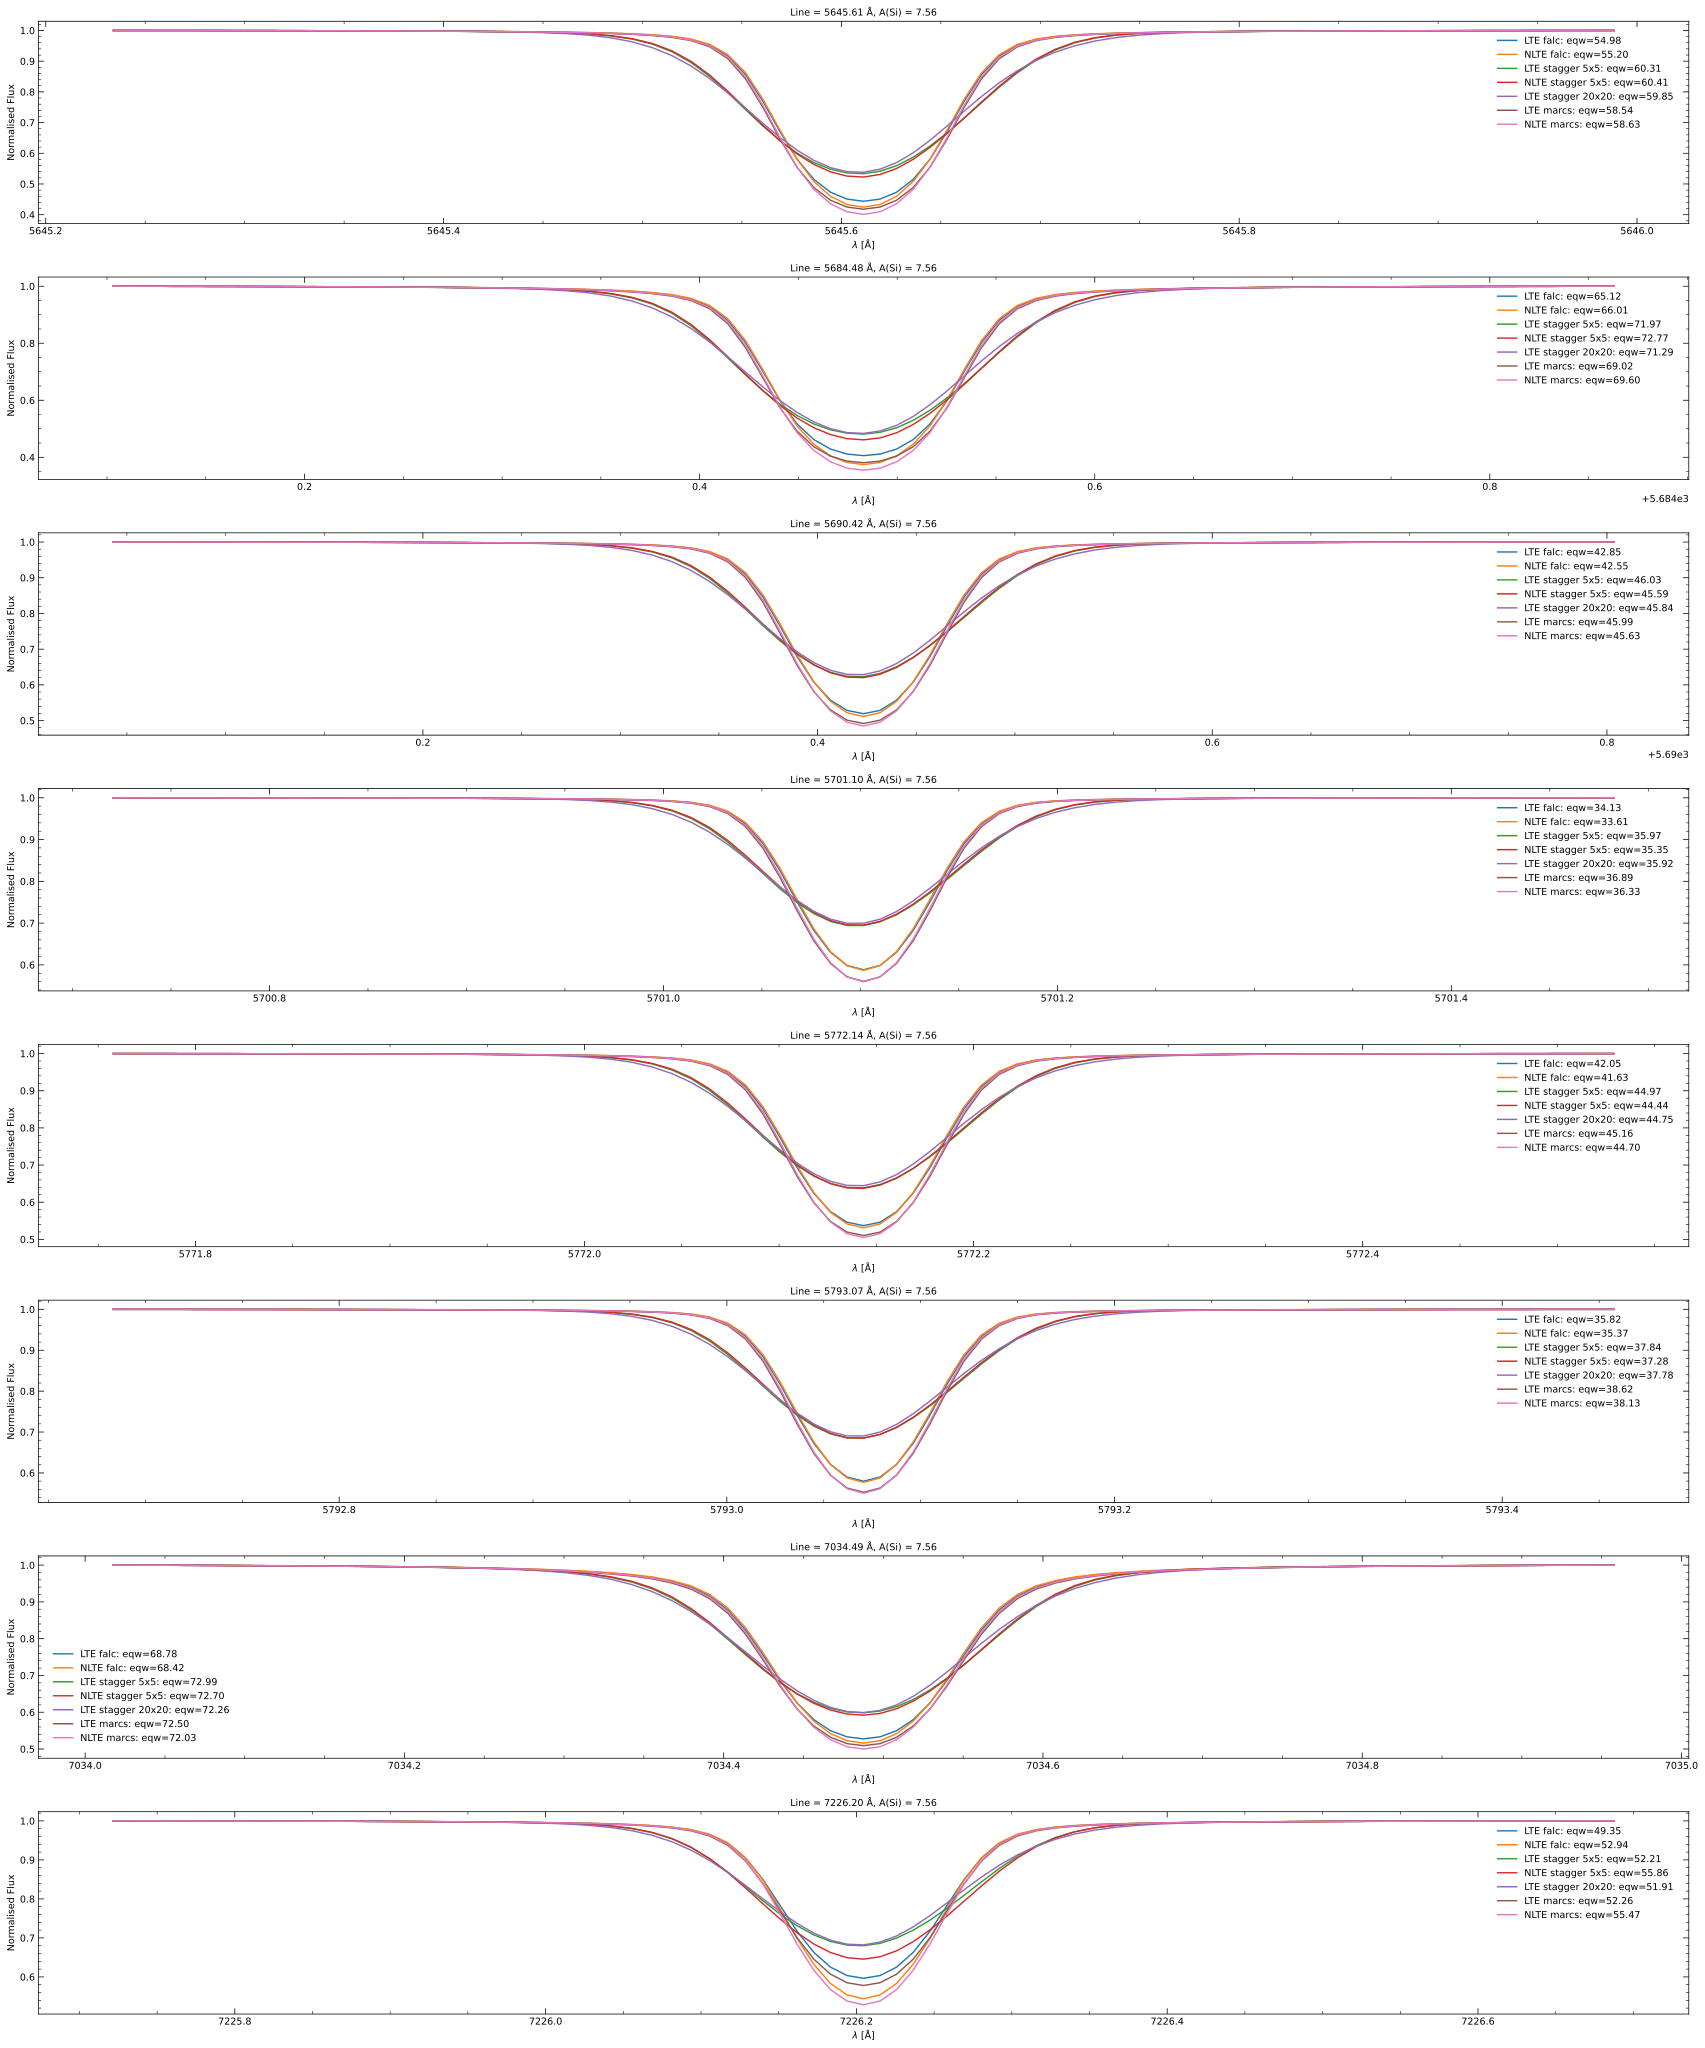

In [11]:
fig, ax = plt.subplots(len(LTEfalc_majorlines), 1, figsize=(25,30))


for i, thisline in enumerate(LTEfalc_majorlines):
        plt.sca(ax[i])
        thisline.plot(qmax=3.5,label=f'LTE falc: eqw={thisline.calc_weq(qmax=3.5):.2f} ')
        #ax[i].plot(thisline.lam, thisline.flux, qmax=3.5,label = 'LTE falc')

for i, thisline in enumerate(NLTEfalc_majorlines):
        plt.sca(ax[i])
        thisline.plot(qmax=3.5,label=f'NLTE falc: eqw={thisline.calc_weq(qmax=3.5):.2f}')
        # ax[i].plot(thisline.lam, thisline.flux, qmax=3.5,label = 'NLTE falc')

# for i, thisline in enumerate(LTEBICH_majorlines):
#         plt.sca(ax[i])
#         thisline.plot(qmax=3.5,label=f'LTE BICH: eqw={thisline.calc_weq(qmax=3.5):.2f}')
#         # ax[i].plot(thisline.lam, thisline.flux, qmax=3.5,label = 'LTE BICH')

# for i, thisline in enumerate(NLTEBICH_majorlines):
#         plt.sca(ax[i])
#         thisline.plot(qmax=3.5,label=f'NLTE BICH: eqw={thisline.calc_weq(qmax=3.5):.2f}')
#         # ax[i].plot(thisline.lam, thisline.flux, qmax=3.5,label = 'NLTE BICH')

for i, thisline in enumerate(LTEstag55230_majorlines):
        plt.sca(ax[i])
        thisline.plot(qmax=3.5,label=f'LTE stagger 5x5: eqw={thisline.calc_weq(qmax=3.5):.2f}')
        # ax[i].plot(thisline.lam, thisline.flux, qmax=3.5,label = 'NLTE BICH')
for i, thisline in enumerate(NLTEstag55230_majorlines):
        plt.sca(ax[i])
        thisline.plot(qmax=3.5,label=f'NLTE stagger 5x5: eqw={thisline.calc_weq(qmax=3.5):.2f}')
        # ax[i].plot(thisline.lam, thisline.flux, qmax=3.5,label = 'NLTE BICH')

for i, thisline in enumerate(LTEstag20230_majorlines):
        plt.sca(ax[i])
        thisline.plot(qmax=3.5,label=f'LTE stagger 20x20: eqw={thisline.calc_weq(qmax=3.5):.2f}')

# for i, thisline in enumerate(NLTEstag20230_majorlines):
#         plt.sca(ax[i])
#         thisline.plot(qmax=3.5,label=f'NLTE stagger 20x20: eqw={thisline.calc_weq(qmax=3.5):.2f}')

for i, thisline in enumerate(LTEmarcs_majorlines):
        plt.sca(ax[i])
        thisline.plot(qmax=3.5,label=f'LTE marcs: eqw={thisline.calc_weq(qmax=3.5):.2f}')
        
for i, thisline in enumerate(NLTEmarcs_majorlines):
        plt.sca(ax[i])
        thisline.plot(qmax=3.5,label=f'NLTE marcs: eqw={thisline.calc_weq(qmax=3.5):.2f}')


[ax[i].legend() for i in range(len(ax))]
plt.tight_layout()

# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys(), loc='lower left')


(5684.2, 5684.8)

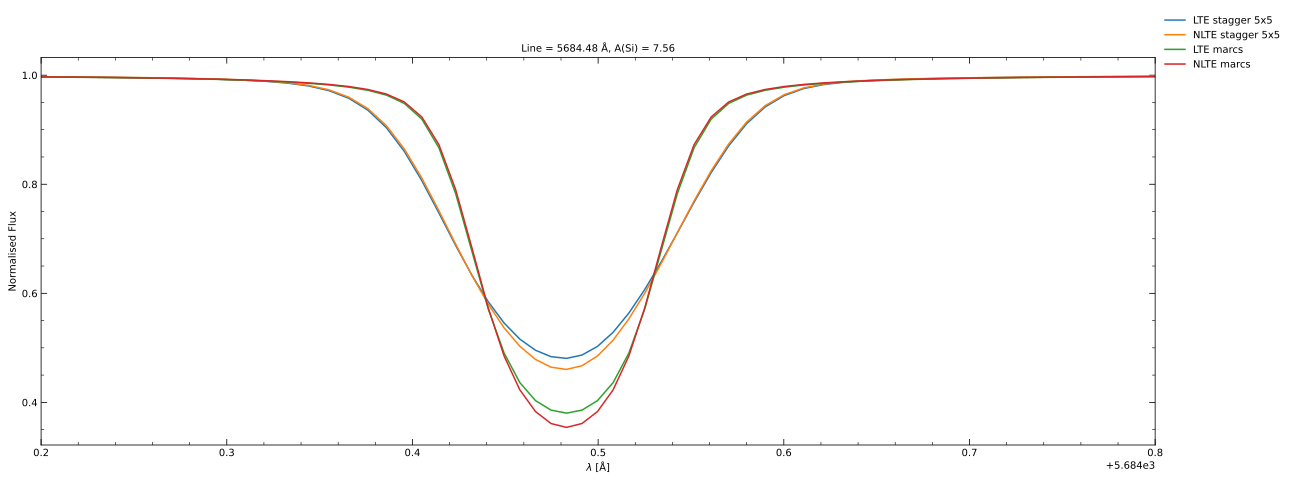

In [12]:
fig2, ax2 = plt.subplots(figsize=(20,7))
# LTEfalc_majorlines[1].plot(label='LTE falc')
# NLTEfalc_majorlines[1].plot(label='NLTE falc')
# LTEBICH_majorlines[1].plot(label='LTE BICH')
# NLTEBICH_majorlines[1].plot(label='NLTE BICH')
LTEstag55230_majorlines[1].plot(label='LTE stagger 5x5')
NLTEstag55230_majorlines[1].plot(label='NLTE stagger 5x5')
LTEmarcs_majorlines[1].plot(label='LTE marcs')
NLTEmarcs_majorlines[1].plot(label='NLTE marcs')
# LTEstag20230_majorlines[1].plot(label='LTE stagger 20x20')

fig2.legend()

ax2.set_xlim(5684.2,5684.8)
# plt.savefig('si_line_ex.pdf')

# Plot differences in equivalent width between 1D LTE and the others, in terms of line wavelength, f value, and energy level

In [13]:
# equivalent widths for the major lines
NLTE3d_eqws = [line.calc_weq(qmax=3.5) for line in NLTEstag55230_majorlines]
LTE3d_eqws = [line.calc_weq(qmax=3.5) for line in LTEstag55230_majorlines]
NLTE1d_eqws = [line.calc_weq(qmax=3.5) for line in NLTEmarcs_majorlines]
LTE1d_eqws = [line.calc_weq(qmax=3.5) for line in LTEmarcs_majorlines]

# equivalent width differences

eqw_NLTE3d_diff_LTE1d_eqws = np.divide(np.absolute(np.subtract(NLTE3d_eqws, LTE1d_eqws)), LTE1d_eqws)*100
eqw_LTE3d_diff_LTE1d_eqws =  np.divide(np.abs(np.subtract(LTE3d_eqws, LTE1d_eqws)), LTE1d_eqws)*100
eqw_NLTE1d_diff_LTE1d_eqws = np.divide(np.abs(np.subtract(NLTE1d_eqws, LTE1d_eqws)), LTE1d_eqws)*100

# centre line wavelengths
major_line_wavelengths = [round(line.lambda0,2) for line in LTEstag55230_majorlines]
major_line_wavelengths

# f values
major_line_f_vals = [round(line.f,4) for line in LTEstag55230_majorlines]
major_line_f_vals

# Low energy level levels
major_line_lower_energylevels = np.round(runLTEstag55230.ev[np.subtract([line.i for line in LTEstag55230_majorlines],1)], 3)

# upper energy levels
major_line_upper_energylevels = np.round(runLTEstag55230.ev[np.subtract([line.j for line in LTEstag55230_majorlines],1)], 3)

# transition $\Delta E$
major_line_energydiffs = np.subtract(major_line_upper_energylevels, major_line_lower_energylevels)

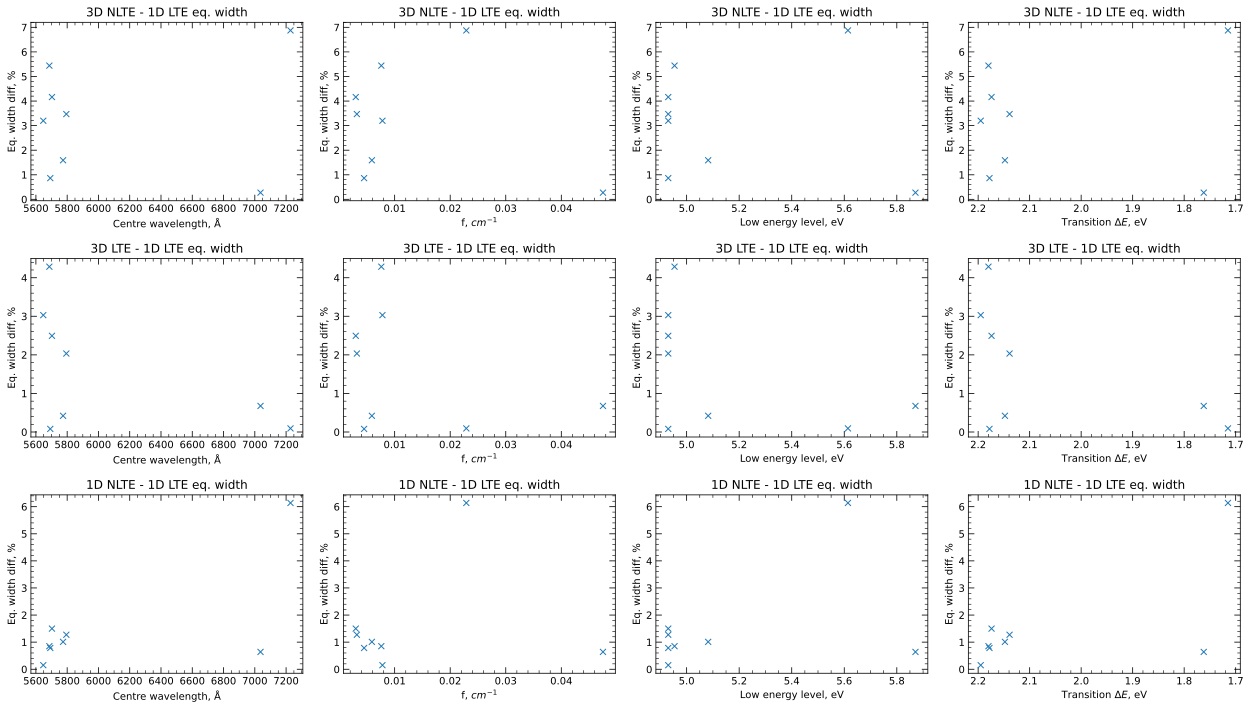

In [14]:
fig_wave, ax_wave = plt.subplots(3, 4, figsize=(17.5,10))

# 3D NLTE vs 1D LTE
ax_wave[0,0].plot(major_line_wavelengths, eqw_NLTE3d_diff_LTE1d_eqws, 'x')
ax_wave[0,0].set_xlabel('Centre wavelength, Å');
ax_wave[0,0].set_ylabel('Eq. width diff, %');
ax_wave[0,0].set_title('3D NLTE - 1D LTE eq. width');

ax_wave[0,1].plot(major_line_f_vals, eqw_NLTE3d_diff_LTE1d_eqws, 'x')
ax_wave[0,1].set_xlabel('f, $cm^{-1}$');
ax_wave[0,1].set_ylabel('Eq. width diff, %');
ax_wave[0,1].set_title('3D NLTE - 1D LTE eq. width');

ax_wave[0,2].plot(major_line_lower_energylevels, eqw_NLTE3d_diff_LTE1d_eqws, 'x')
ax_wave[0,2].set_xlabel('Low energy level, eV');
ax_wave[0,2].set_ylabel('Eq. width diff, %');
ax_wave[0,2].set_title('3D NLTE - 1D LTE eq. width');

ax_wave[0,3].plot(major_line_energydiffs, eqw_NLTE3d_diff_LTE1d_eqws, 'x')
ax_wave[0,3].set_xlabel('Transition $\Delta E$, eV');
ax_wave[0,3].set_ylabel('Eq. width diff, %');
ax_wave[0,3].set_title('3D NLTE - 1D LTE eq. width');
ax_wave[0,3].invert_xaxis()


# 3D LTE vs 1D NLTE
ax_wave[1,0].plot(major_line_wavelengths, eqw_LTE3d_diff_LTE1d_eqws, 'x')
ax_wave[1,0].set_xlabel('Centre wavelength, Å');
ax_wave[1,0].set_ylabel('Eq. width diff, %');
ax_wave[1,0].set_title('3D LTE - 1D LTE eq. width');

ax_wave[1,1].plot(major_line_f_vals, eqw_LTE3d_diff_LTE1d_eqws, 'x')
ax_wave[1,1].set_xlabel('f, $cm^{-1}$');
ax_wave[1,1].set_ylabel('Eq. width diff, %');
ax_wave[1,1].set_title('3D LTE - 1D LTE eq. width');

ax_wave[1,2].plot(major_line_lower_energylevels, eqw_LTE3d_diff_LTE1d_eqws, 'x')
ax_wave[1,2].set_xlabel('Low energy level, eV');
ax_wave[1,2].set_ylabel('Eq. width diff, %');
ax_wave[1,2].set_title('3D LTE - 1D LTE eq. width');

ax_wave[1,3].plot(major_line_energydiffs, eqw_LTE3d_diff_LTE1d_eqws, 'x')
ax_wave[1,3].set_xlabel('Transition $\Delta E$, eV');
ax_wave[1,3].set_ylabel('Eq. width diff, %');
ax_wave[1,3].set_title('3D LTE - 1D LTE eq. width');
ax_wave[1,3].invert_xaxis()



# 1D NLTE vs 3D LTE
ax_wave[2,0].plot(major_line_wavelengths, eqw_NLTE1d_diff_LTE1d_eqws, 'x')
ax_wave[2,0].set_xlabel('Centre wavelength, Å');
ax_wave[2,0].set_ylabel('Eq. width diff, %');
ax_wave[2,0].set_title('1D NLTE - 1D LTE eq. width');

ax_wave[2,1].plot(major_line_f_vals, eqw_NLTE1d_diff_LTE1d_eqws, 'x')
ax_wave[2,1].set_xlabel('f, $cm^{-1}$');
ax_wave[2,1].set_ylabel('Eq. width diff, %');
ax_wave[2,1].set_title('1D NLTE - 1D LTE eq. width');

ax_wave[2,2].plot(major_line_lower_energylevels, eqw_NLTE1d_diff_LTE1d_eqws, 'x')
ax_wave[2,2].set_xlabel('Low energy level, eV');
ax_wave[2,2].set_ylabel('Eq. width diff, %');
ax_wave[2,2].set_title('1D NLTE - 1D LTE eq. width')

ax_wave[2,3].plot(major_line_energydiffs, eqw_NLTE1d_diff_LTE1d_eqws, 'x')
ax_wave[2,3].set_xlabel('Transition $\Delta E$, eV');
ax_wave[2,3].set_ylabel('Eq. width diff, %');
ax_wave[2,3].set_title('1D NLTE - 1D LTE eq. width');
ax_wave[2,3].invert_xaxis()



plt.tight_layout()
plt.savefig('si_plot.pdf')

In [15]:
# # Debug - check wavelengths and upper/lower energy levels are consistent in multi : 1Å = 1/12398eV

# print(f' Multi wavelengths (Å): {major_line_wavelengths}')

# print(f'Multi wavelengths (Å) to eV: {np.divide(12398 ,major_line_wavelengths), 3}')

# print(f'Multi enerfy diff (eV): {major_line_energydiffs}')

# plt.scatter(major_line_wavelengths, np.subtract((np.divide(12398 ,major_line_wavelengths)), major_line_energydiffs))

# 5th line (5773.75Å) has wrong? transition energy 

# # transition from 56 to 10
# # acc. to multi:  58311.660cm-1 (7.23 eV)    to 40991.883cm-1 (5.082346 eV) ie 
# print(f'Transition from level 56 to 10: {round((58311.660 - 40991.883),3)}cm-1 ie. 2.147eV')
# print(f'eV acc. level 10: {runLTEmarcs.ev[9]},   eV acc. level 56: {runLTEmarcs.ev[55]}, eV diff = {runLTEmarcs.ev[56] - runLTEmarcs.ev[10]}')